# Exploratory Data Analysis
### Part 3
***

## Machine Learning 

The conclusion to this analysis will look to imputing the data into the best fitting machine learning model and the overall findings from the whole analysis comparing CO2 emissions and food products being produced. Compared will be the following algorithms:

- Extra Trees Regressor
- XG Boost Regressor
- Random Forest Regressor


#### Model Testing 

In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics as ms
import numpy as np

In [32]:
#Import Dependencies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors, matplotlib.colorbar as colorbar 
import matplotlib.cm as cm, matplotlib.font_manager as fm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline
import plotly.express as px

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read in the files
df=pd.read_csv('..//ML_Table.csv')
df.head()

,country_code,area,year_pc,CO2_emissions_tonnes,Population,category_code_1,food_product_categories_1,production_tonnes_1,total_kgs_CO2_1,category_code_2,...,production_tonnes_41,total_kgs_CO2_41,category_code_42,food_product_categories_42,production_tonnes_42,total_kgs_CO2_42,category_code_43,food_product_categories_43,production_tonnes_43,total_kgs_CO2_43
0,0,Afghanistan,2000,71679740.0,19542982,1,Apples,40540.06,58783.0870,2,...,0.0,0.0,42,Wheat & Rye (Bread),1470000.0,10518040.0,43,Wine,0.0,0.0
1,0,Afghanistan,2001,72477702.0,19688632,1,Apples,39541.74,57335.5230,2,...,0.0,0.0,42,Wheat & Rye (Bread),1600000.0,11434520.0,43,Wine,0.0,0.0
2,0,Afghanistan,2002,73529311.0,21000256,1,Apples,35630.08,51663.6160,2,...,0.0,0.0,42,Wheat & Rye (Bread),2690000.0,19231760.0,43,Wine,0.0,0.0
3,0,Afghanistan,2003,74715262.0,22645130,1,Apples,28042.99,40662.3355,2,...,0.0,0.0,42,Wheat & Rye (Bread),3480000.0,24916800.0,43,Wine,0.0,0.0
4,0,Afghanistan,2004,75604429.0,23553551,1,Apples,16691.83,24203.1535,2,...,0.0,0.0,42,Wheat & Rye (Bread),2390000.0,17112400.0,43,Wine,0.0,0.0


In [8]:
# Set variables
y = df ['CO2_emissions_tonnes']
X = df [['total_kgs_CO2_1','total_kgs_CO2_2','total_kgs_CO2_3','total_kgs_CO2_4','total_kgs_CO2_6','total_kgs_CO2_','total_kgs_CO2_8','total_kgs_CO2_9','total_kgs_CO2_10','total_kgs_CO2_11','total_kgs_CO2_12','total_kgs_CO2_13','total_kgs_CO2_14','total_kgs_CO2_15','total_kgs_CO2_17','total_kgs_CO2_18','total_kgs_CO2_19','total_kgs_CO2_20','total_kgs_CO2_21','total_kgs_CO2_22','total_kgs_CO2_23','total_kgs_CO2_24','total_kgs_CO2_25','total_kgs_CO2_26','total_kgs_CO2_27','total_kgs_CO2_28','total_kgs_CO2_29','total_kgs_CO2_30','total_kgs_CO2_31','total_kgs_CO2_32','total_kgs_CO_33','total_kgs_CO2_34','total_kgs_CO2_35','total_kgs_CO2_37','total_kgs_CO2_39','total_kgs_CO2_40','total_kgs_CO2_41','total_kgs_CO2_42','total_kgs_CO2_43']]
X.shape

(4201, 39)

In [9]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(3150, 39)

In [10]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [11]:
y_pred = regressor.predict(X_test)
y_pred

array([4.73274667e+07, 3.74072179e+07, 5.20436725e+07, ...,
       8.77050348e+10, 3.99595840e+06, 2.02820720e+07])

In [12]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,4.732747e+07
781,3.788563e+07,3.740722e+07
2165,4.881502e+07,5.204367e+07
1217,4.942875e+07,4.437258e+07
1006,7.199476e+08,1.397920e+09
...,...,...
2907,2.624575e+10,3.838209e+10
3630,3.550416e+06,3.814430e+06
3000,8.785206e+10,8.770503e+10
982,4.187952e+06,3.995958e+06


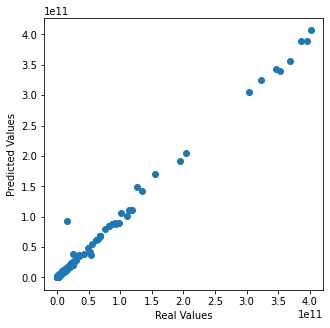

In [13]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show() 

In [14]:
# List the features sorted in descending order by feature importance
importance_sorted_idx = regressor.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({regressor.feature_importances_[i]})")

total_kgs_CO2_19: (0.5137630653294117)
total_kgs_CO2_32: (0.2369290194693125)
total_kgs_CO2_3: (0.11734813665498753)
total_kgs_CO_33: (0.052730428535790186)
total_kgs_CO2_39: (0.013370095823080661)
total_kgs_CO2_: (0.010162750735284835)
total_kgs_CO2_4: (0.007418826332820842)
total_kgs_CO2_1: (0.006810781451972475)
total_kgs_CO2_29: (0.006805639139443457)
total_kgs_CO2_21: (0.00477775129651004)
total_kgs_CO2_11: (0.004413108775804443)
total_kgs_CO2_31: (0.00354534503537851)
total_kgs_CO2_12: (0.003301425384496289)
total_kgs_CO2_15: (0.0032476330023086973)
total_kgs_CO2_27: (0.002401274772795817)
total_kgs_CO2_42: (0.0019071898549874963)
total_kgs_CO2_30: (0.0016835849162191966)
total_kgs_CO2_18: (0.001637651933288939)
total_kgs_CO2_20: (0.0014203552754377701)
total_kgs_CO2_2: (0.001287569167397487)
total_kgs_CO2_23: (0.0008135087817725404)
total_kgs_CO2_13: (0.0007250660830378071)
total_kgs_CO2_37: (0.00043674855356068203)
total_kgs_CO2_6: (0.00040986777104316157)
total_kgs_CO2_9: (0.0

<AxesSubplot:>

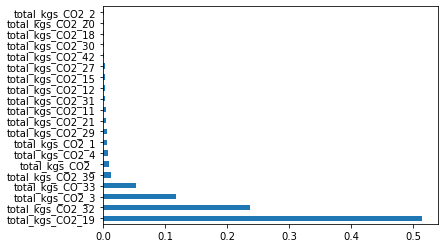

In [15]:
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [16]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 433454016.28
Mean Squared Error: 8.118344899441254e+18
R-squared scores: 0.99


In [18]:
# Fitting Extra Trees Regressor to the dataset
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 10, random_state = 0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=10, random_state=0)

In [19]:
y_pred = etr.predict(X_test)
y_pred

array([3.88637632e+07, 3.74583689e+07, 4.84010282e+07, ...,
       8.59973620e+10, 3.97139000e+06, 2.09628432e+07])

In [20]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,3.886376e+07
781,3.788563e+07,3.745837e+07
2165,4.881502e+07,4.840103e+07
1217,4.942875e+07,7.122149e+07
1006,7.199476e+08,6.941424e+08
...,...,...
2907,2.624575e+10,2.297951e+10
3630,3.550416e+06,3.843314e+06
3000,8.785206e+10,8.599736e+10
982,4.187952e+06,3.971390e+06


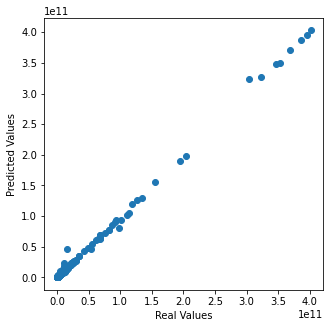

In [21]:
# Plot real values vs predicted for Extra Trees Regressor
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show() 

In [22]:
# List the features of Extra Trees Regressor sorted in descending order by feature importance
importance_sorted_idx = etr.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({etr.feature_importances_[i]})")

total_kgs_CO2_19: (0.34197304883233925)
total_kgs_CO2_32: (0.13226413061942968)
total_kgs_CO2_3: (0.1055880784060286)
total_kgs_CO2_11: (0.08587079034990641)
total_kgs_CO2_4: (0.06941459700014305)
total_kgs_CO2_28: (0.0472504255728009)
total_kgs_CO2_42: (0.030580860517151913)
total_kgs_CO2_20: (0.021231708247344806)
total_kgs_CO2_6: (0.016947066182193906)
total_kgs_CO2_31: (0.015057794356941951)
total_kgs_CO2_12: (0.014891138262388876)
total_kgs_CO_33: (0.012787054951970803)
total_kgs_CO2_30: (0.011237555928381184)
total_kgs_CO2_41: (0.01011710097866447)
total_kgs_CO2_15: (0.009982228587493546)
total_kgs_CO2_35: (0.008042902320523494)
total_kgs_CO2_25: (0.007723638897818951)
total_kgs_CO2_2: (0.007377163811495524)
total_kgs_CO2_18: (0.005347224205202364)
total_kgs_CO2_8: (0.004897074988871589)
total_kgs_CO2_24: (0.004805565024129052)
total_kgs_CO2_27: (0.004577746251532198)
total_kgs_CO2_39: (0.004569729678459401)
total_kgs_CO2_13: (0.003226617148790917)
total_kgs_CO2_37: (0.0031474054

<AxesSubplot:>

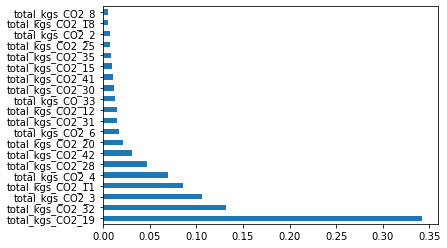

In [23]:
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [24]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 335260395.91
Mean Squared Error: 2.560554705606461e+18
R-squared scores: 1.0


In [25]:
# Fitting XG Boost Regressor to the dataset
import xgboost as xg
xgbr = xg.XGBRegressor(n_estimators = 10, random_state = 0)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [26]:
y_pred = xgbr.predict(X_test)
y_pred

array([4.2407946e+08, 1.6831638e+08, 1.6831638e+08, ..., 8.4865884e+10,
       8.2262960e+07, 1.8913299e+08], dtype=float32)

In [27]:
pred_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
pred_df

,Real Values,Predicted Values
3604,4.245974e+07,4.240795e+08
781,3.788563e+07,1.683164e+08
2165,4.881502e+07,1.683164e+08
1217,4.942875e+07,1.683164e+08
1006,7.199476e+08,2.068750e+09
...,...,...
2907,2.624575e+10,3.570316e+10
3630,3.550416e+06,9.183214e+07
3000,8.785206e+10,8.486588e+10
982,4.187952e+06,8.226296e+07


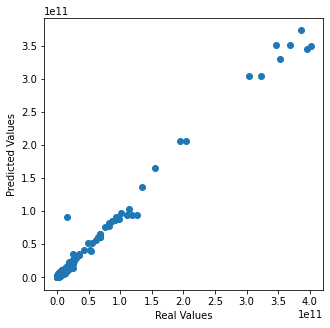

In [24]:
# Plot real values vs predicted
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show() 

In [25]:
# List the features of XG Boost Regressor sorted in descending order by feature importance
importance_sorted_idx = xgbr.feature_importances_.argsort()[::-1]
for i in importance_sorted_idx:
    print(f"{X.columns[i]}: ({xgbr.feature_importances_[i]})")

total_kgs_CO2_19: (0.7769872546195984)
total_kgs_CO2_3: (0.07589844614267349)
total_kgs_CO_33: (0.05980155989527702)
total_kgs_CO2_39: (0.023133642971515656)
total_kgs_CO2_1: (0.01229138858616352)
total_kgs_CO2_26: (0.012278266251087189)
total_kgs_CO2_31: (0.009784838184714317)
total_kgs_CO2_40: (0.004197007976472378)
total_kgs_CO2_25: (0.0030843839049339294)
total_kgs_CO2_8: (0.002930073067545891)
total_kgs_CO2_: (0.002016750629991293)
total_kgs_CO2_15: (0.0018721260130405426)
total_kgs_CO2_32: (0.0017555889207869768)
total_kgs_CO2_41: (0.0016538257477805018)
total_kgs_CO2_11: (0.0016121827065944672)
total_kgs_CO2_37: (0.0013650491600856185)
total_kgs_CO2_42: (0.001335591427050531)
total_kgs_CO2_30: (0.0012086732313036919)
total_kgs_CO2_23: (0.0010575372725725174)
total_kgs_CO2_4: (0.0010305276373401284)
total_kgs_CO2_34: (0.0009208196424879134)
total_kgs_CO2_29: (0.0008374933386221528)
total_kgs_CO2_20: (0.0007784449844621122)
total_kgs_CO2_2: (0.00044632074423134327)
total_kgs_CO2_9

<AxesSubplot:>

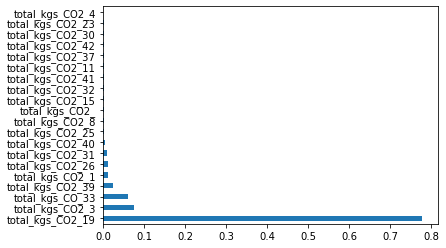

In [28]:
feat_importances = pd.Series(xgbr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared scores
r2 = r2_score(y_test, y_pred)

RMSE = np.sqrt(ms.mean_squared_error(y_test,y_pred))

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))
print('RMSE:', round(RMSE,2))

## Confusion Matrix

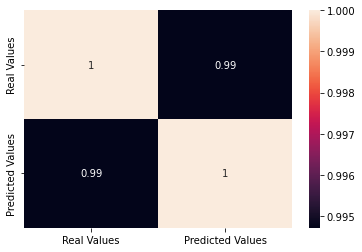

In [28]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = pred_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

# Findings

In this analysis compared the CO2 emission rates of countries based on categorized food product production. Through cleaning the data, building a database and dashboard, and exploring the data with various tools and machine learning algorithms, we were able to fulfil the analysis's purpose; find correlations between selected features in our data including, the name of the country producing the most emissions, the food products whose productions most or least significant impact the rates of emission and if population plays factor into rates. 

The analysis consisted of almost 9 million data points that we were able to extract in an impacting and reusable code set. Rather than taking a conventional route to the data we looked to multiple sources and utilized SQL to create a composed master table of all the selected features of the 4 original data bases that made the data suitable for analysis.  

We chose this dataset because we were interested in whether we could identify causality of a specific type of product with a country’s overall CO2 emissions. Population can also have an effect on this, including the level of industrial development of the country. We didn't go too far down that path because that would have been a very complex program.


### Investigative Query

1. **Does the amount of agricultural production predict the CO2 emissions of a country?**

2. **What products being produced by countries have the highest and lowest emissions?**

3. **Can we predict the year based on CO2 emissions of a country?**

4. **Is there a correlation between population and the rate of production impacting CO2 emissions?**



### Exploratory Data Analysis

2. **What products being produced by countries have the highest emissions?**

Throught the Tableau dashboard we are able to see what food products have the highest and lowest impacting CO2 emissions. Using the heatmap below the foods that have the most global impact in production  are:

- Sugar Cane at 34,684,911,578 Tonnes

- Maize(Corn) 18,467,107,546 Tonnes

- Rice 14,367,247,693 Tonnes

- Wheat 14,130,705,994 Tonnes



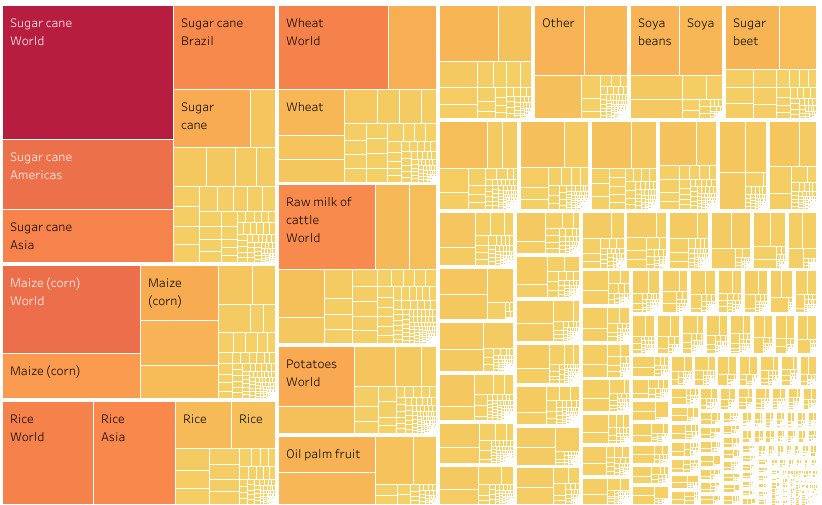

3. **Can we predict the year based on CO2 emissions of a country?**


4. **Is there a correlation between population and the rate of production impacting CO2 emissions?**

Example below: **Cane Sugar**

In [41]:
#Load the data
ML_data = pd.read_csv('ML_Table.csv')

world_pop = pd.read_csv('World_Population_Data_2000-2021.csv')

cane_sugar= ML_data.loc[:, ['country_code', 'area', 'year_pc', 'CO2_emissions_tonnes', 'Population', 'category_code_9', 'food_product_categories_9', 'production_tonnes_9', 'total_kgs_CO2_9']]


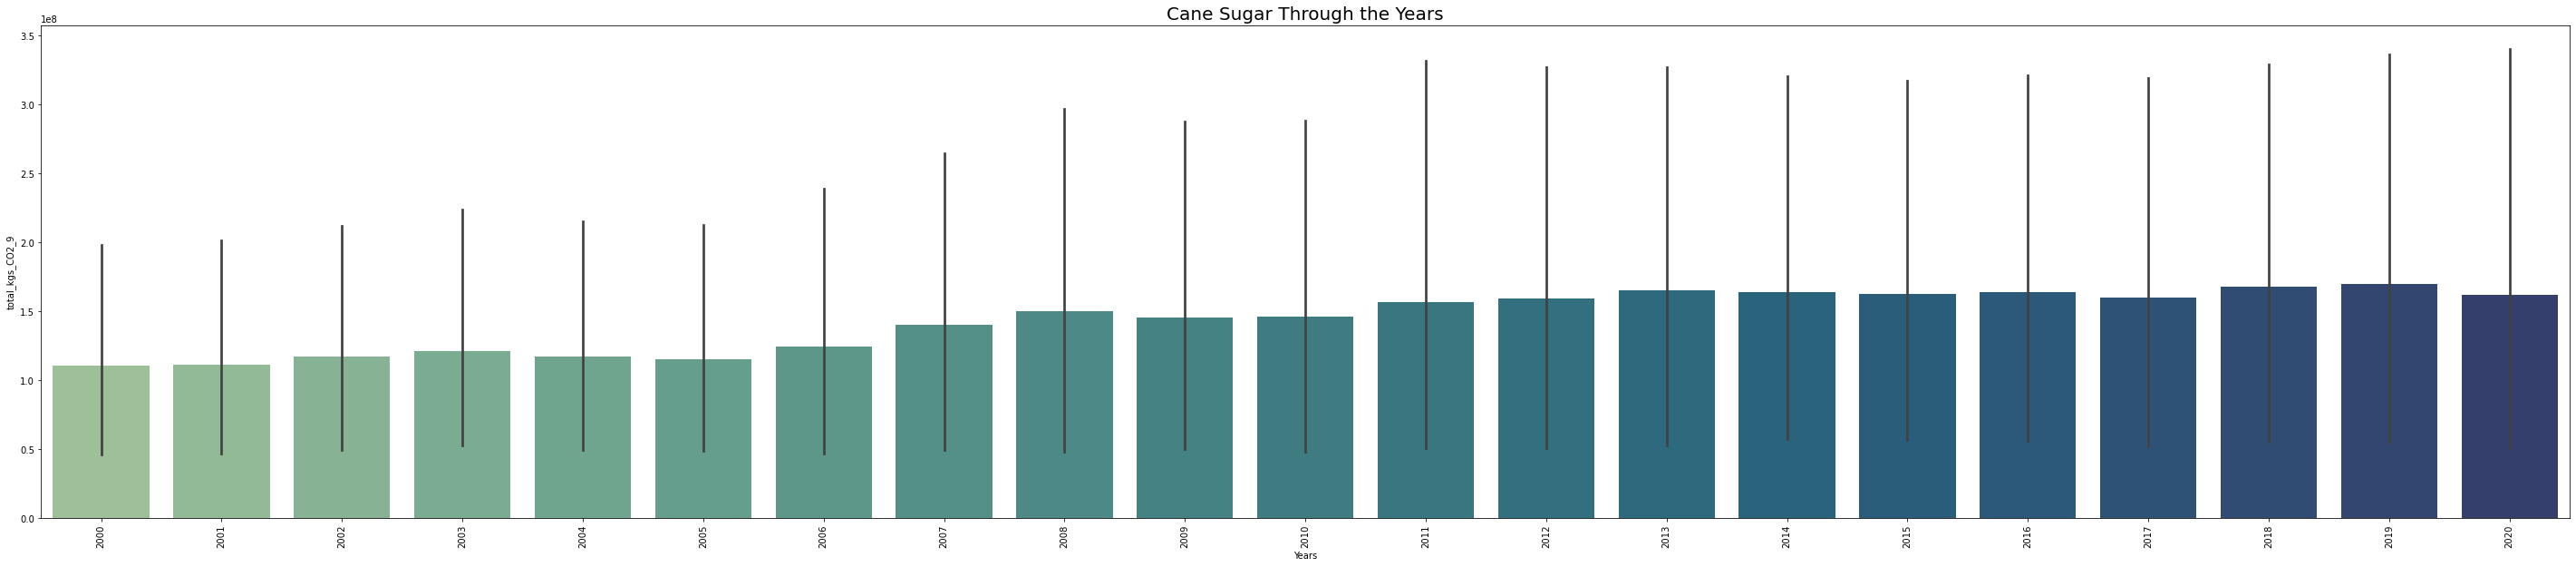

In [42]:
plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = cane_sugar['year_pc'], y = cane_sugar['total_kgs_CO2_9'], palette = 'crest')
ax.set_xlabel(xlabel = 'Years', fontsize = 10)
ax.set_ylabel(ylabel = 'total_kgs_CO2_9', fontsize = 10)
ax.set_title(label = 'Cane Sugar Through the Years', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

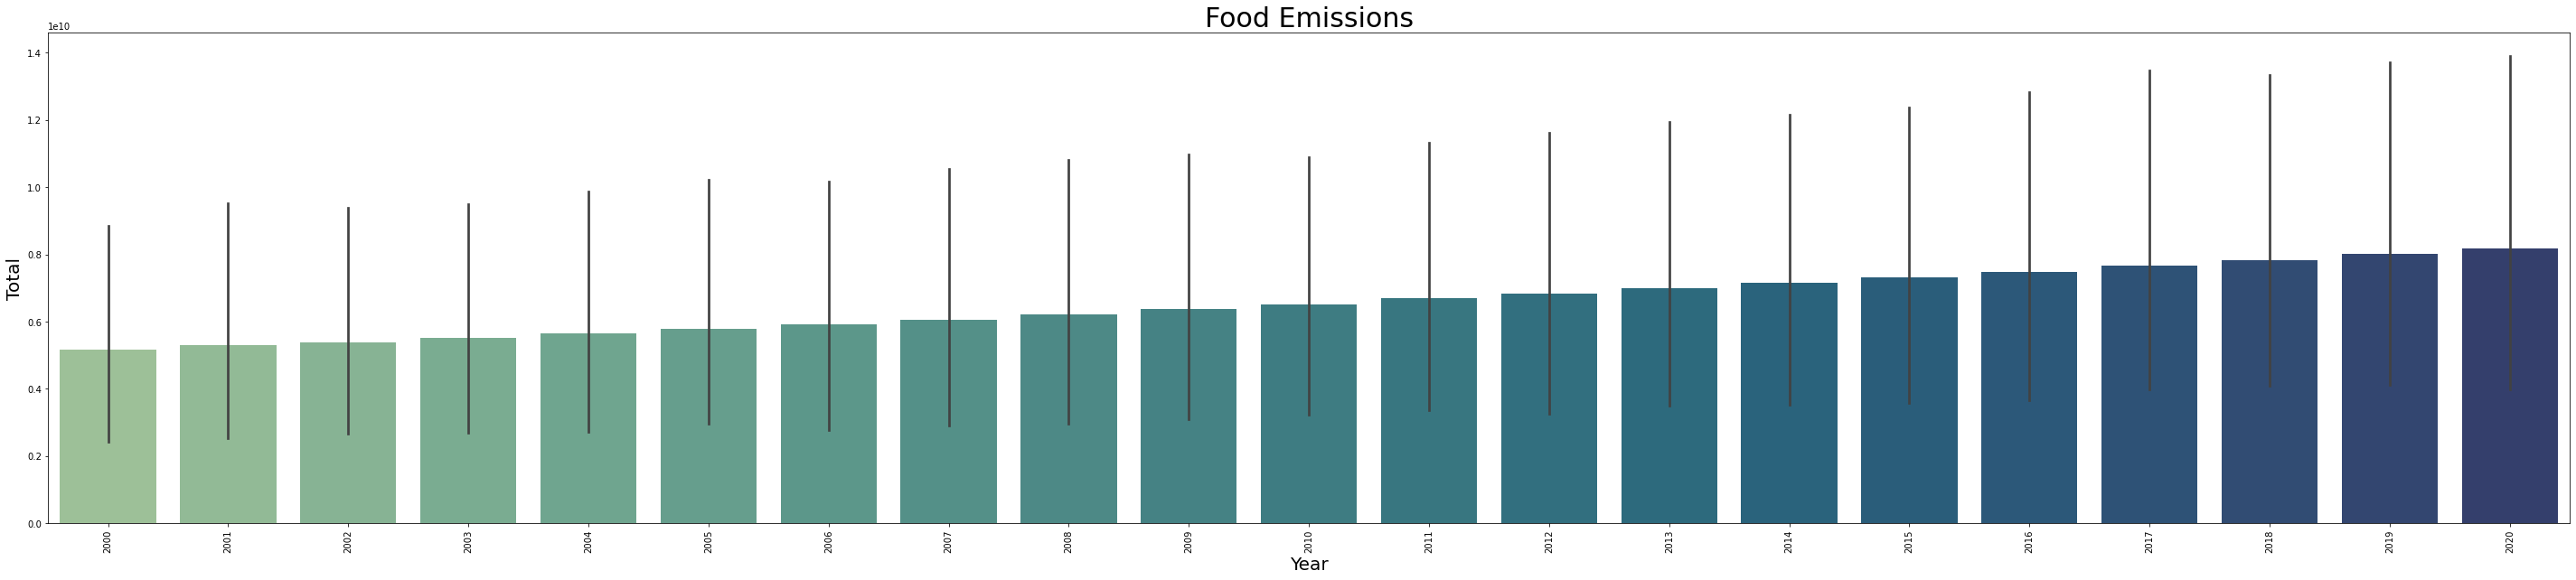

In [37]:
#CO2 Emissions by year 

plt.rcParams['figure.figsize'] = (50, 10)
ax = sns.barplot(x = ML_data['year_pc'], y = ML_data['CO2_emissions_tonnes'], palette = 'crest')
ax.set_xlabel(xlabel = 'Year', fontsize = 20)
ax.set_ylabel(ylabel = 'Total', fontsize = 20)
ax.set_title(label = 'Food Emissions', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

In [44]:
fig = px.scatter_matrix(cane_sugar, dimensions=["year_pc", "total_kgs_CO2_9", "Population"], color="area", color_discrete_sequence =px.colors.sequential.Viridis)
fig.show()

Throughout the data the structure of the emissions over years was consistent with a gradual increase in other corresponding factors. Looking at the 43 food product categories that were broken down and evaluated a similar trend was seen among all points. Since 2000 when our data began there has been a gradual linear increase in the over all CO2 production from all factors of query.

Utilizing a matrix through Plotly Ex became instrumental in comparing the data in a comparative and visually appealing manor. With 220 individual countries x the 43 food product categories x the 20 years of data per country there is 189,200 factors. Through the matrix scatter plot we are able to individually group points of query and how they interact while keeping data integrity across the set. This code block as well as others was utilized for all 43 Products and see unknown trends. Another notable finding was in the production of barley (beer), it was one of the higher producing foods but was not a cornered industry like sugar cane being predominantly from Brazil and India. There was a fairly even country wide distribution of barely production and corresponding CO2 emission. People like beer!


### Machine Learning 
### Extra Trees Regressor



1. **Does the amount of agricultural production predict the CO2 emissions of a country?**

Three different models were tested for performance in their ability to predict overall CO2 emissions based on CO2 emissions of individual products. The Extra Trees Regressor model had the highest R2 value and lowest MSE and MAE values. Also, no predicted values differed dramatically from actual values. For these reasons we decided to use the ExtraTreesRegressor for our machine learning model.


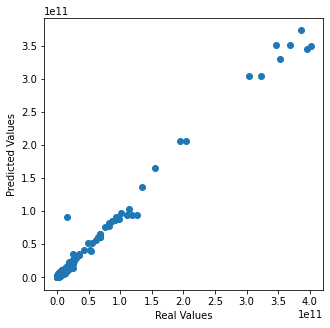

In [31]:
# Plot real values vs predicted for Extra Trees Regressor
plt.figure(figsize=(5,5))
plt.scatter(pred_df['Real Values'], pred_df['Predicted Values'])
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show() 

<AxesSubplot:>

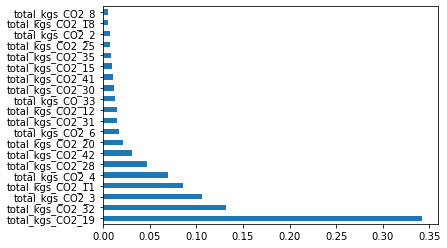

In [30]:
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

Another reason for choosing this model was that it allowed us to sort features based on importance. This will help us tune the model by excluding unimportant features and provides us with insightful information about the data by telling us which features are most important in predicting overall CO2 levels.

This model appeared to tell us that categories 3, 19, and 32 were the most significant features. These correspond to barley, maize, and poultry meat respectively with maize being the most important feature in predicting CO2 emissions by far. This does not mean that maize production emmits the most CO2 but that the amount of CO2 produced by maize production in any given country during any given year between 2000 and 2020 correlates very closely with the overall C02 emissions of that country during that year.

Noteworthy further research directions should someone widen the scope of the project:

Study other  greenhouse gases in the light of their effects on global warming.
Fun fact: methane—CH4—is 20X more powerful than CO2 in furthering global warming.
This has many implications for the rise in Earth’s mean temperature, especially in the short term—accelerating us toward a “tipping point.”
So why are we so interested in CO2?
Because, even so, methane is only 25% of global warming.
CO2 is 74%—almost 3X as much.
